In [1]:
import pandas as pd
import os
from multiprocessing import  Pool
import multiprocessing
import datetime
from notebook_shared import utils

In [2]:
df = pd.read_parquet("data/mstatsdf.parquet")
df.describe()

,azure_brazilsouth,gcp_southamerica-east1,aws_sa-east-1,aws_ca-central-1,gcp_northamerica-northeast1,aws_us-east-1,azure_eastus,gcp_us-east4,aws_us-west-1,aws_us-west-2,...,gcp_europe-west3,aws_ap-south-1,gcp_asia-south1,azure_centralindia,aws_ap-northeast-1,gcp_asia-northeast1,azure_japaneast,aws_ap-southeast-2,azure_australiaeast,gcp_australia-southeast1
count,3054.000000,3054.000000,3054.000000,3054.000000,3054.0,3054.000000,3054.000000,3054.0,3054.000000,3054.000000,...,3054.0,3054.000000,3054.0,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.0
mean,0.993124,0.999673,0.997708,0.998690,1.0,0.995416,0.992141,1.0,0.997380,0.995088,...,1.0,0.997708,1.0,0.998035,0.998035,0.999673,0.998035,0.998363,0.994434,1.0
std,0.082651,0.018095,0.054246,0.036173,0.0,0.067562,0.111288,0.0,0.051122,0.069922,...,0.0,0.047829,0.0,0.044288,0.044288,0.018095,0.057198,0.040436,0.074413,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,...,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,2.000000,1.000000,1.0,1.000000,2.000000,1.0,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.0


In [3]:
# Count Per Region How Many Measurements Are Affected:
df_cnt_zeroes = df
df_cnt_zeroes

totals = {
    "AWS": {"OK": 0, "MISS": 0, "ADD": 0},
    "AZURE": {"OK": 0, "MISS": 0, "ADD": 0},
    "GCP": {"OK": 0, "MISS": 0, "ADD": 0},
}

for pr in df_cnt_zeroes.columns:
    p = pr.split('_')[0].upper()
    r = pr.split('_')[1]
    ok_measurement = df_cnt_zeroes[df_cnt_zeroes[pr] == 1][pr].count()
    missing_measurement = df_cnt_zeroes[df_cnt_zeroes[pr] == 0][pr].count()
    more_measurements = df_cnt_zeroes[df_cnt_zeroes[pr] > 1][pr].count()
    totals[p]['OK']   += ok_measurement
    totals[p]['MISS'] += missing_measurement
    totals[p]['ADD']  += more_measurements
    print(p, ' & ', r, ' & ' , ok_measurement, ' & ', missing_measurement, ' & ', more_measurements, ' \\\\')

pr = 'azure_brazilsouth'
totals

AZURE  &  brazilsouth  &  3033  &  21  &  0  \\
GCP  &  southamerica-east1  &  3053  &  1  &  0  \\
AWS  &  sa-east-1  &  3045  &  8  &  1  \\
AWS  &  ca-central-1  &  3050  &  4  &  0  \\
GCP  &  northamerica-northeast1  &  3054  &  0  &  0  \\
AWS  &  us-east-1  &  3040  &  14  &  0  \\
AZURE  &  eastus  &  3016  &  31  &  7  \\
GCP  &  us-east4  &  3054  &  0  &  0  \\
AWS  &  us-west-1  &  3046  &  8  &  0  \\
AWS  &  us-west-2  &  3039  &  15  &  0  \\
AZURE  &  westus  &  2996  &  58  &  0  \\
AZURE  &  westus2  &  3048  &  6  &  0  \\
GCP  &  us-west2  &  3053  &  1  &  0  \\
GCP  &  us-west4  &  3053  &  1  &  0  \\
AWS  &  eu-west-2  &  3046  &  8  &  0  \\
AZURE  &  uksouth  &  3042  &  8  &  4  \\
GCP  &  europe-west2  &  3054  &  0  &  0  \\
AWS  &  eu-central-1  &  3048  &  6  &  0  \\
AZURE  &  germanywestcentral  &  3049  &  4  &  1  \\
GCP  &  europe-west3  &  3054  &  0  &  0  \\
AWS  &  ap-south-1  &  3047  &  7  &  0  \\
GCP  &  asia-south1  &  3054  &  0  &  0  \\
A

{'AWS': {'OK': 30458, 'MISS': 81, 'ADD': 1},
 'AZURE': {'OK': 27313, 'MISS': 159, 'ADD': 14},
 'GCP': {'OK': 30536, 'MISS': 4, 'ADD': 0}}

In [4]:
INPUT_FILE = "dataset"
FSIZE = "full"
df = pd.read_parquet(utils.get_dataset_path(INPUT_FILE, FSIZE))

In [5]:
# double_schedueling_df
df_ds = df.groupby(['driver_invocation', 'provider', 'region'], observed=True)['workload_invocation'].nunique()
df_ds = df_ds.reset_index()
df_ds

,driver_invocation,provider,region,workload_invocation
0,2021-08-01 13:30:03.035,AWS,ap-northeast-1,1
1,2021-08-01 13:30:03.035,AWS,ap-south-1,1
2,2021-08-01 13:30:03.035,AWS,ap-southeast-2,1
3,2021-08-01 13:30:03.035,AWS,ca-central-1,1
4,2021-08-01 13:30:03.035,AWS,eu-central-1,1
...,...,...,...,...
83883,2021-09-30 23:30:03.438,GCP,northamerica-northeast1,1
83884,2021-09-30 23:30:03.438,GCP,southamerica-east1,1
83885,2021-09-30 23:30:03.438,GCP,us-east4,1
83886,2021-09-30 23:30:03.438,GCP,us-west2,1


In [6]:
# Situations where driver triggered multiple workloads
df_ds.groupby(['provider', 'region'], observed=True)['workload_invocation'].unique()

provider  region                 
AWS       ap-northeast-1                [1]
          ap-south-1                    [1]
          ap-southeast-2                [1]
          ca-central-1                  [1]
          eu-central-1                  [1]
          eu-west-2                     [1]
          sa-east-1                  [1, 2]
          us-east-1                     [1]
          us-west-1                     [1]
          us-west-2                     [1]
AZURE     australiaeast                 [1]
          brazilsouth                   [1]
          centralindia                  [1]
          eastus                     [1, 2]
          germanywestcentral         [1, 2]
          japaneast                  [1, 2]
          uksouth                    [1, 2]
          westus                        [1]
          westus2                       [1]
GCP       asia-northeast1               [1]
          asia-south1                   [1]
          australia-southeast1          [1

In [7]:
# Situations where driver triggered multiple workloads
df_ds.groupby(['provider', 'region'], observed=True)['workload_invocation'].value_counts()

provider  region                   workload_invocation
AWS       ap-northeast-1           1                      2895
          ap-south-1               1                      2894
          ap-southeast-2           1                      2896
          ca-central-1             1                      2897
          eu-central-1             1                      2895
          eu-west-2                1                      2893
          sa-east-1                1                      2892
                                   2                         1
          us-east-1                1                      2887
          us-west-1                1                      2893
          us-west-2                1                      2886
AZURE     australiaeast            1                      2884
          brazilsouth              1                      2880
          centralindia             1                      2895
          eastus                   1                      2864


In [8]:
# invocation per workload counts
df_iwc = df.groupby(['driver_invocation', 'provider', 'region'], observed=True)['workload_invocation'].count()
df_iwc = df_iwc.reset_index()
df_iwc

,driver_invocation,provider,region,workload_invocation
0,2021-08-01 13:30:03.035,AWS,ap-northeast-1,600
1,2021-08-01 13:30:03.035,AWS,ap-south-1,600
2,2021-08-01 13:30:03.035,AWS,ap-southeast-2,600
3,2021-08-01 13:30:03.035,AWS,ca-central-1,600
4,2021-08-01 13:30:03.035,AWS,eu-central-1,600
...,...,...,...,...
83883,2021-09-30 23:30:03.438,GCP,northamerica-northeast1,600
83884,2021-09-30 23:30:03.438,GCP,southamerica-east1,600
83885,2021-09-30 23:30:03.438,GCP,us-east4,600
83886,2021-09-30 23:30:03.438,GCP,us-west2,600


In [9]:
iwcs = df_iwc[['provider', 'region', 'workload_invocation']].groupby(['provider', 'region'], observed=True)['workload_invocation'].value_counts().rename('vcs')
iwcs = iwcs.reset_index()
iwcs

,provider,region,workload_invocation,vcs
0,AWS,ap-northeast-1,600,2894
1,AWS,ap-northeast-1,599,1
2,AWS,ap-south-1,600,2894
3,AWS,ap-southeast-2,600,2895
4,AWS,ap-southeast-2,547,1
...,...,...,...,...
1397,GCP,us-west2,596,4
1398,GCP,us-west2,594,2
1399,GCP,us-west2,595,1
1400,GCP,us-west4,600,2899


In [66]:
iwcs[iwcs['region'] == 'ap-northeast-1']

,provider,region,workload_invocation,vcs
0,AWS,ap-northeast-1,600,2894
1,AWS,ap-northeast-1,599,1


In [60]:
df_iwc['workload_invocation'].max(), iwcs['vcs'].max(), iwcs['vcs'].min()

(1200, 2899, 1)

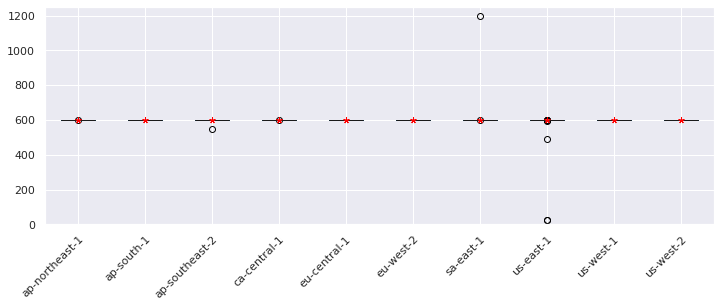

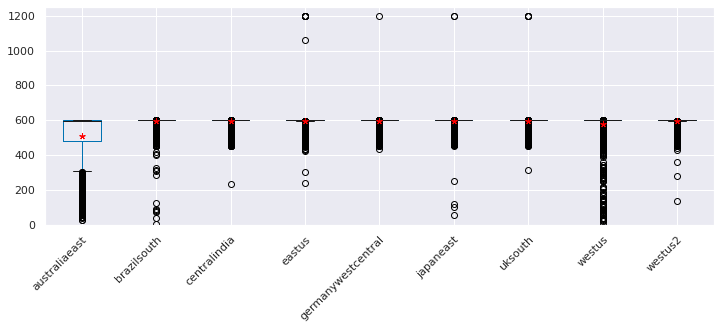

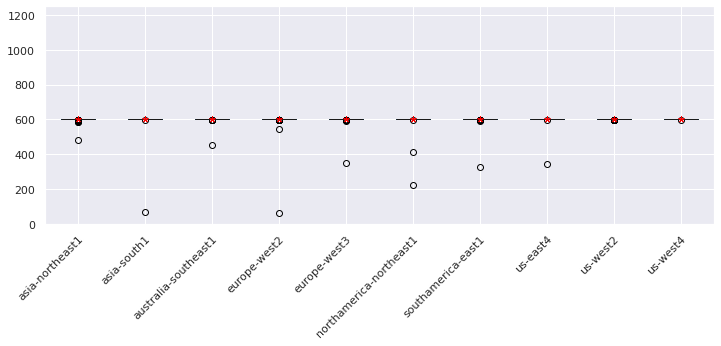

In [97]:
plt.close('all')

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-colorblind')

providers = list(iwcs['provider'].unique())
for p in providers:
    regions = list(iwcs[iwcs['provider'] == p]['region'].unique())
    fig, axis = plt.subplots(figsize=(12,4))
    df_iwcp = df_iwc[(df_iwc['provider'] == p)]
    
    bxp = df_iwcp.groupby(['region'], observed=True)
    axis = utils.boxplot(axis, bxp, "", utils.tick_get_1st, showfliers=True, with_mean=True, rot=45)
    axis.set_ylim(0, 1250)
    labels = axis.get_xticklabels()
    axis.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    utils.savefig(fig, ['data_collection', f'bxp_{p}'], iwcs=iwcs[iwcs['provider'] == p])

In [107]:
iwcs[iwcs['workload_invocation'] == 600]

,provider,region,workload_invocation,vcs
0,AWS,ap-northeast-1,600,2894
2,AWS,ap-south-1,600,2894
3,AWS,ap-southeast-2,600,2895
5,AWS,ca-central-1,600,2896
7,AWS,eu-central-1,600,2895
8,AWS,eu-west-2,600,2893
9,AWS,sa-east-1,600,2891
12,AWS,us-east-1,600,2879
19,AWS,us-west-1,600,2893
20,AWS,us-west-2,600,2886


In [106]:
error_counts_df = pd.DataFrame(iwcs[iwcs['workload_invocation'] != 600].groupby(['provider', 'region'], observed=True)['vcs'].sum()).reset_index()
error_counts_df

,provider,region,vcs
0,AWS,ap-northeast-1,1
1,AWS,ap-southeast-2,1
2,AWS,ca-central-1,1
3,AWS,sa-east-1,2
4,AWS,us-east-1,8
5,AZURE,australiaeast,1682
6,AZURE,brazilsouth,478
7,AZURE,centralindia,379
8,AZURE,eastus,750
9,AZURE,germanywestcentral,446
